In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('/home/rahman/kuliah-workspace/videogame-sales-dataset/XboxOne_GameSales.csv',encoding = 'windows-1252')

In [3]:
data.columns

Index(['Pos', 'Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [24]:
data

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            613 non-null    int64  
 1   Game           613 non-null    object 
 2   Year           505 non-null    float64
 3   Genre          613 non-null    object 
 4   Publisher      505 non-null    object 
 5   North America  613 non-null    float64
 6   Europe         613 non-null    float64
 7   Japan          613 non-null    float64
 8   Rest of World  613 non-null    float64
 9   Global         613 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 48.0+ KB


In [5]:
data.head(15)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
5,6,Call of Duty: Advanced Warfare,2014.0,Shooter,Activision,3.25,1.49,0.01,0.48,5.22
6,7,Battlefield 1,2016.0,Shooter,Electronic Arts,3.37,1.26,0.02,0.48,5.13
7,8,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.94,1.62,0.02,0.45,5.03
8,9,Halo 5: Guardians,2015.0,Shooter,Microsoft Studios,2.94,1.49,0.03,0.45,4.92
9,10,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,2.91,1.44,0.00,0.44,4.79


In [6]:
data.tail(15)

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
598,599,Fe,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
599,600,We Sing (2016),2016.0,Music,THQ Nordic,0.0,0.0,0.0,0.0,0.0
600,601,Don Bradman Cricket 17,2016.0,Sports,Tru Blu Entertainment,0.0,0.0,0.0,0.0,0.0
601,602,Ace Combat 7: Skies Unknown,2019.0,Shooter,Bandai Namco Games,0.0,0.0,0.0,0.0,0.0
602,603,The Sexy Brutale,NaN,Adventure,NaN,0.0,0.0,0.0,0.0,0.0
603,604,Metro Exodus,2019.0,Shooter,Deep Silver,0.0,0.0,0.0,0.0,0.0
604,605,Anthem,2019.0,Role-Playing,Electronic Arts,0.0,0.0,0.0,0.0,0.0
605,606,AereA,2017.0,Role-Playing,Soedesco,0.0,0.0,0.0,0.0,0.0
606,607,Moons Of Madness,2018.0,Role-Playing,Unknown,0.0,0.0,0.0,0.0,0.0
607,608,Iron Harvest,2018.0,Strategy,Unknown,0.0,0.0,0.0,0.0,0.0


In [7]:
data.Publisher.unique()

array(['Rockstar Games', 'Activision', 'Microsoft Studios',
       'Electronic Arts', 'Bethesda Softworks', 'Ubisoft', 'EA Sports',
       'Blizzard Entertainment', '2K Sports',
       'Warner Bros. Interactive Entertainment', 'Namco Bandai Games',
       'Square Enix', '505 Games', '2K Games', 'Capcom',
       'Konami Digital Entertainment', 'Mojang', 'Gearbox Software',
       'Harmonix Music Systems', 'Take-Two Interactive',
       'Disney Interactive Studios', 'Sega', 'Studio Wildcard',
       'Bandai Namco Games', 'Focus Home Interactive', 'Deep Silver',
       'Rebellion Developments', 'Telltale Games', 'Gun Media',
       'Codemasters', 'Majesco Entertainment', 'Koch Media', 'Astragon',
       nan, 'City Interactive', 'Sold Out', 'Tecmo Koei',
       'Insomniac Games', 'THQ Nordic', 'Milestone S.r.l.',
       'Dusenberry Martin Racing', 'Soedesco', 'Koei Tecmo',
       'Bigben Interactive', 'Milestone', 'Milestone S.r.l',
       'Frontier Developments', 'Nordic Games', 'PQube', 

In [21]:
data.Genre.unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Misc', 'Role-Playing',
       'Racing', 'Sports', 'Fighting', 'Adventure', 'MMO', 'Music',
       'Simulation', 'Strategy', 'Platform', 'Puzzle', 'Visual Novel'],
      dtype=object)

/home/rahman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rahman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


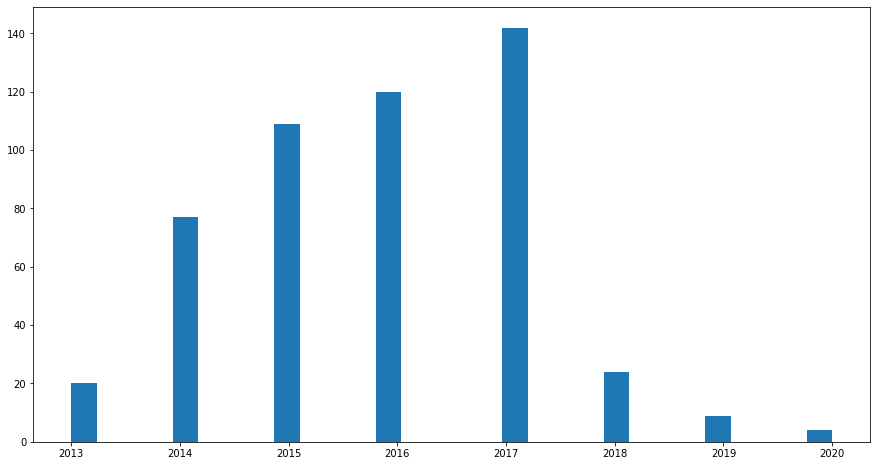

In [9]:
plt.subplots(figsize = (15,8))
plt.hist(data.Year,bins = 30)
plt.show()

In [10]:
rockstar = data[data.Publisher == 'Rockstar Games']
activision = data[data.Publisher == 'Activision']
mic = data[data.Publisher == 'Microsoft Studios']
bethesda = data[data.Publisher == 'Bethesda Softworks']

In [11]:
rockstar.head()

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
179,180,L.A. Noire,2017.0,Adventure,Rockstar Games,0.14,0.09,0.00,0.02,0.25


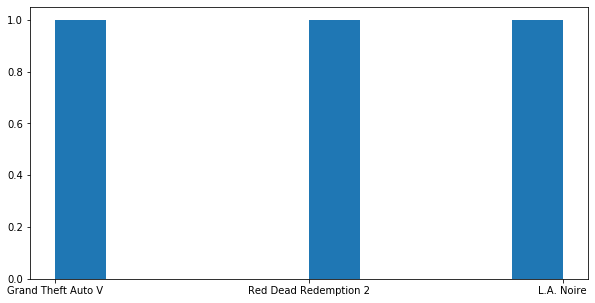

In [12]:
plt.subplots(figsize = (10,5))
plt.hist(rockstar.Game)
plt.show()

In [13]:
action = data[data.Genre == 'Action']
shooter = data[data.Genre == 'Shooter']
actionAdventure = data[data.Genre == 'Action-Adventure']
misc = data[data.Genre == 'Misc']
rolePlay = data[data.Genre == 'Role-Playing']
racing = data[data.Genre == 'Racing']

In [23]:
action.head(*)

AttributeError: 'Series' object has no attribute 'info'

/home/rahman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rahman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


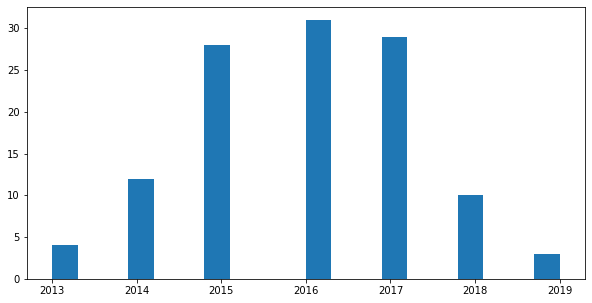

In [15]:
plt.subplots(figsize = (10,5))
plt.hist(action.Year, bins = 20)
plt.show()